In [1]:
from __future__ import division
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = stats.norm.rvs(size=10000)
ns = stats.norm()

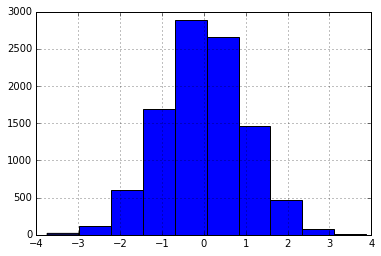

In [3]:
pd.Series(data).hist()

In [4]:
ns.ppf(0.95)

1.6448536269514722

#### Prueba de rachas


In [5]:
#H0: Los datos se presentan en sucesión aleatoria 
#Ha: Los datos no se presentan en sucesión aleatoria

In [136]:
aux = pd.DataFrame(data=data,columns=['x'])
aux['x1'] = aux.x.shift(-1) 
aux['indicador'] = (aux.x>aux.x1).astype(int)
aux
aux.dropna(inplace=True)
aux = "".join([str(x) for x in aux.indicador.tolist()])

In [137]:
def rachas(x):
    R = 1
    prev = x[0] 
    for i,c in enumerate(x):
        if i>0:
            if c!=prev:
                R+=1
                prev = c
    return R

In [138]:
R = rachas(aux)
n = len(data)
alpha = 0.05

In [139]:
Z = (R-(2*n-1)/3)/np.sqrt((16*n-29)/90)

In [140]:
print "estadígrafo de prueba Z=%.4f, valor crítico:%.4f" %(Z,ns.ppf(1-alpha/2))
print "p-value=%f, alpha:%.2f" % (ns.sf(Z),alpha)

estadígrafo de prueba Z=-0.2214, valor crítico:1.9600
p-value=0.587602, alpha:0.05


#### Prueba Serial

In [11]:
data1 = stats.uniform.rvs(size=1000)
data2 = stats.uniform.rvs(size=1000)

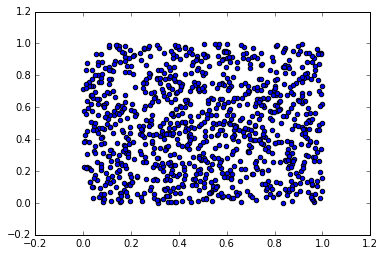

In [12]:
plt.scatter(data1,data2)

In [13]:
df = pd.DataFrame({'x':pd.Series(data1),'y':pd.Series(data2)})

In [148]:
df['b1'] = pd.cut(df.x,bins=10,include_lowest=True).astype(str)
df['b2'] = pd.cut(df.y,bins=10,include_lowest=True).astype(str)

In [151]:
aux = df[['b1','b2','x']].groupby(['b1','b2']).count()['x'].tolist()

In [153]:
k = 10
stats.chisquare(f_exp=[len(df)/k**2 for i in range(k**2)],f_obs=aux)

Power_divergenceResult(statistic=98.199999999999989, pvalue=0.50381970240968288)

#### Prueba Póker 

In [17]:
#Todos diferentes
#Exactamente un par
#Dos pares
#Una tercia
#Póker

In [34]:
from itertools import permutations as pr
from itertools import combinations as cn
from itertools import product

In [81]:
x='0123456789'
x = [int(c) for c in x]
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [84]:
aux = list(product(x,repeat=4))

In [79]:
def todos_dist(t):
    return len(set(t))==len(t)

def pares(t):
    pares = 0
    for x in set(t):
        if t.count(x) == 2:
            pares+=1
    return pares

def tercias(t):
    tercias = 0
    for x in set(t):
        if t.count(x) == 3:
            tercias+=1
    return tercias

def poker(t):
    pok = 0
    for x in set(t):
        if t.count(x) == 4:
            pok+=1
    return pok

In [127]:
E=[sum([1 for t in aux if todos_dist(t)]),
 sum([1 for t in aux if pares(t)==1]),
 sum([1 for t in aux if pares(t)==2]),
 sum([1 for t in aux if tercias(t)==1]),
 sum([1 for t in aux if poker(t)==1]),
]

In [155]:
E

[5040, 4320, 270, 360, 10]

In [128]:
data = np.round(data,4)

In [129]:
decimales = [str(number-int(number))[1:] for number in list(data) ]
decimales = [x.replace('0.','.') for x in decimales]
decimales = [x.replace('.','') for x in decimales]
decimales = [x+"0"*(4-len(x)) for x in decimales]
decimales = [[int(c) for c in x] for x in decimales]
decimales = [tuple(t) for t in decimales]

In [130]:
O=[sum([1 for t in decimales if todos_dist(t)]),
 sum([1 for t in decimales if pares(t)==1]),
 sum([1 for t in decimales if pares(t)==2]),
 sum([1 for t in decimales if tercias(t)==1]),
 sum([1 for t in decimales if poker(t)==1]),
]


In [131]:
O

[5001, 4317, 283, 392, 7]

In [132]:
stats.chisquare(f_exp=E,f_obs=O)

Power_divergenceResult(statistic=4.6742394179894182, pvalue=0.32238408405895552)